# Scientific Computing Environment Demonstration

**Purpose**: Demonstrate core libraries for scientific computing, data analysis, and machine learning.

**Requirements**: Execute cells sequentially from top to bottom.

## Table of Contents

1. Environment Check
2. NumPy - Numerical Foundation
3. SciPy - Advanced Algorithms
4. Pandas - Data Manipulation
5. Matplotlib - Visualization
6. scikit-learn - Machine Learning
7. PyTorch - GPU Computing

---

# 1. Environment Check

Verify all packages are installed and GPU is accessible.

In [2]:
import sys
import numpy as np
import scipy
import pandas as pd
import matplotlib
import sklearn
import torch

print("="*70)
print("ENVIRONMENT CHECK")
print("="*70)
print(f"Python: {sys.version.split()[0]}")
print(f"NumPy: {np.__version__}")
print(f"SciPy: {scipy.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"PyTorch: {torch.__version__}")
print()
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA: {torch.version.cuda}")
else:
    print("GPU: Not available (CPU mode)")
print("="*70)

ENVIRONMENT CHECK
Python: 3.9.23
NumPy: 1.26.4
SciPy: 1.13.1
Pandas: 2.3.1
Matplotlib: 3.6.2
scikit-learn: 1.1.3
PyTorch: 1.12.0

GPU: Not available (CPU mode)


/opt/anaconda3/envs/mmfusion/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---

# 2. NumPy - Numerical Computing Foundation

## What is NumPy?

**Core Functionality**:
- Multi-dimensional arrays (ndarray)
- Vectorized operations (10-100x faster than Python loops)
- Broadcasting (element-wise operations on different shapes)
- Linear algebra (matrix operations, solving systems)

**When to Use**: Any numerical computation, array/matrix operations, performance-critical code.

**Why Essential**: Foundation for all scientific Python packages.

In [3]:
import numpy as np
import time

# Vectorization performance demo
n = 1_000_000
data_list = list(range(n))
data_array = np.arange(n)

# Python loop
start = time.time()
result_loop = [x**2 for x in data_list]
time_loop = time.time() - start

# NumPy vectorized
start = time.time()
result_numpy = data_array ** 2
time_numpy = time.time() - start

print(f"Python loop: {time_loop:.4f}s")
print(f"NumPy vectorized: {time_numpy:.4f}s")
print(f"Speedup: {time_loop/time_numpy:.1f}x")

# Linear algebra demo
A = np.array([[2, 3], [5, 4]])
b = np.array([8, 13])
x = np.linalg.solve(A, b)
print(f"\nSolved Ax=b: x={x}")

Python loop: 0.1595s
NumPy vectorized: 0.0023s
Speedup: 70.1x

Solved Ax=b: x=[1. 2.]


---

# 3. SciPy - Advanced Scientific Algorithms

## What is SciPy?

**Core Modules**:
- `scipy.optimize`: Function minimization, curve fitting
- `scipy.integrate`: Numerical integration, ODEs
- `scipy.linalg`: Advanced linear algebra
- `scipy.stats`: Statistical distributions, hypothesis testing
- `scipy.signal`: Signal processing, filtering

**When to Use**: Optimization, numerical integration, advanced statistics.

In [4]:
from scipy.optimize import minimize
from scipy.integrate import quad

# Optimization demo
def objective(x):
    return (x-3)**2 + 5

result = minimize(objective, [0.0], method='BFGS')
print(f"Minimization: x*={result.x[0]:.4f}, f(x*)={result.fun:.4f}")

# Integration demo
gaussian = lambda x: np.exp(-x**2)
integral, error = quad(gaussian, -np.inf, np.inf)
print(f"\nIntegration: result={integral:.6f}, sqrt(pi)={np.sqrt(np.pi):.6f}")

Minimization: x*=3.0000, f(x*)=5.0000

Integration: result=1.772454, sqrt(pi)=1.772454


---

# 4. Pandas - Data Manipulation

## What is Pandas?

**Core Structures**:
- DataFrame: 2D labeled table (like SQL/Excel)
- Series: 1D labeled array

**Core Operations**:
- Loading: `read_csv()`, `read_excel()`
- Cleaning: `dropna()`, `fillna()`, `drop_duplicates()`
- Transformation: filtering, groupby, merge
- Analysis: `describe()`, `corr()`, pivot tables

**When to Use**: Tabular data, data cleaning, exploratory analysis, feature engineering.

In [5]:
import pandas as pd
np.random.seed(42)

# Create synthetic data
df = pd.DataFrame({
    'math': np.random.normal(75, 15, 100).clip(0, 100),
    'english': np.random.normal(70, 12, 100).clip(0, 100),
    'study_hours': np.random.uniform(5, 40, 100)
})
df['average'] = df[['math', 'english']].mean(axis=1)

print("First 5 rows:")
print(df.head())
print("\nStatistics:")
print(df.describe())
print("\nCorrelation:")
print(df.corr())

First 5 rows:
        math    english  study_hours    average
0  82.450712  53.015551    35.708058  67.733132
1  72.926035  64.952256    30.926902  68.939146
2  84.715328  65.887426    29.395551  75.301377
3  97.845448  60.372673    29.586943  79.109060
4  71.487699  68.064571    17.582190  69.776135

Statistics:
             math     english  study_hours     average
count  100.000000  100.000000   100.000000  100.000000
mean    73.414461   70.241235    22.056414   71.827848
std     13.564674   11.371350     9.632117    8.249968
min     35.703823   46.974745     5.503772   53.403282
25%     65.986415   60.332074    14.718047   67.093135
50%     73.095656   71.009286    23.174513   71.729633
75%     81.089281   76.458045    29.573366   76.548261
max    100.000000  100.000000    39.154823   95.661212

Correlation:
                 math   english  study_hours   average
math         1.000000 -0.133097    -0.030750  0.730377
english     -0.133097  1.000000     0.109835  0.579756
study_hours

---

# 5. Matplotlib - Data Visualization

## What is Matplotlib?

**Architecture**: Figure (window) -> Axes (plot area) -> Axis (X/Y axis)

**When to Use**: Publication-quality figures, any 2D plotting, custom visualizations.

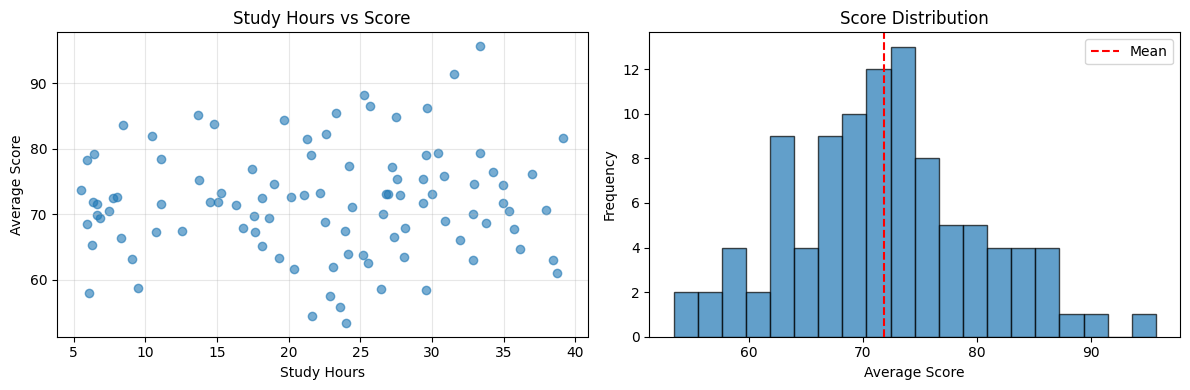

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot
axes[0].scatter(df['study_hours'], df['average'], alpha=0.6)
axes[0].set_xlabel('Study Hours')
axes[0].set_ylabel('Average Score')
axes[0].set_title('Study Hours vs Score')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(df['average'], bins=20, edgecolor='black', alpha=0.7)
axes[1].axvline(df['average'].mean(), color='r', linestyle='--', label='Mean')
axes[1].set_xlabel('Average Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Score Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

---

# 6. scikit-learn - Machine Learning

## What is scikit-learn?

**Core Functionality**:
- Supervised: Classification, Regression
- Unsupervised: Clustering, Dimensionality Reduction
- Preprocessing: Scaling, Encoding
- Evaluation: Metrics, Cross-validation

**Consistent API**: `fit()` -> `predict()`

**When to Use**: Classical ML (not deep learning), tabular data, model evaluation.

Model: score = 0.0343 * hours + 71.0069
R2 score: 0.0057
RMSE: 7.4895


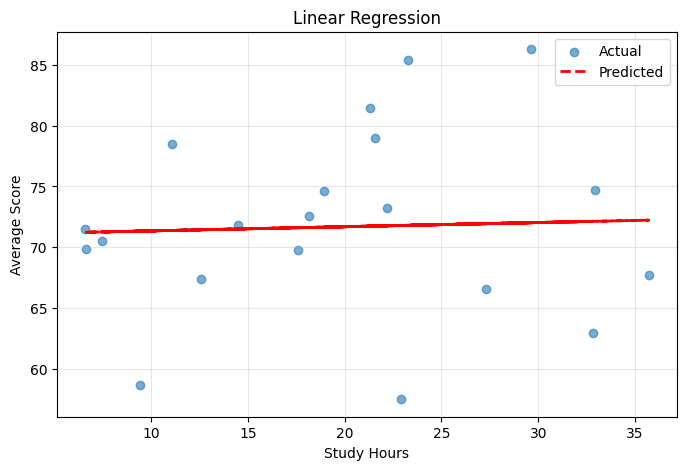

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data
X = df[['study_hours']].values
y = df['average'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model: score = {model.coef_[0]:.4f} * hours + {model.intercept_:.4f}")
print(f"R2 score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Visualize
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, 'r--', linewidth=2, label='Predicted')
plt.xlabel('Study Hours')
plt.ylabel('Average Score')
plt.title('Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

# 7. PyTorch - GPU Computing

## What is PyTorch?

**Core Components**:
- Tensors: Like NumPy arrays but run on GPU
- Autograd: Automatic differentiation
- nn.Module: Neural network building blocks
- GPU acceleration: 10-100x speedup

**When to Use**: Deep learning, GPU computation, automatic differentiation.

In [8]:
import torch
import time

def monte_carlo_pi(n, device):
    x = torch.rand(n, device=device)
    y = torch.rand(n, device=device)
    inside = (x**2 + y**2) <= 1.0
    return 4.0 * inside.float().mean().item()

n = 10_000_000

# CPU
start = time.time()
pi_cpu = monte_carlo_pi(n, 'cpu')
time_cpu = time.time() - start

print(f"CPU: pi={pi_cpu:.6f}, time={time_cpu:.4f}s")

# GPU (if available)
if torch.cuda.is_available():
    start = time.time()
    pi_gpu = monte_carlo_pi(n, 'cuda')
    torch.cuda.synchronize()
    time_gpu = time.time() - start
    print(f"GPU: pi={pi_gpu:.6f}, time={time_gpu:.4f}s")
    print(f"Speedup: {time_cpu/time_gpu:.2f}x")
else:
    print("GPU: Not available")

print(f"\nTrue pi: {np.pi:.6f}")

CPU: pi=3.140598, time=0.1315s
GPU: Not available

True pi: 3.141593


## PyTorch Neural Network Demo

**Task**: Build and train a simple MLP (Multi-Layer Perceptron) for binary classification.

**Goal**: Demonstrate PyTorch's neural network building, automatic differentiation, and training loop.

Training samples: 800
Test samples: 200
Feature dimension: 2

Model architecture:
SimpleMLP(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Training...
Epoch [20/100], Loss: 0.3516, Test Acc: 0.8150
Epoch [40/100], Loss: 0.2587, Test Acc: 0.8950
Epoch [60/100], Loss: 0.2112, Test Acc: 0.9250
Epoch [80/100], Loss: 0.1506, Test Acc: 0.9550
Epoch [100/100], Loss: 0.1001, Test Acc: 0.9800

Training complete!
Final Test Accuracy: 0.9800


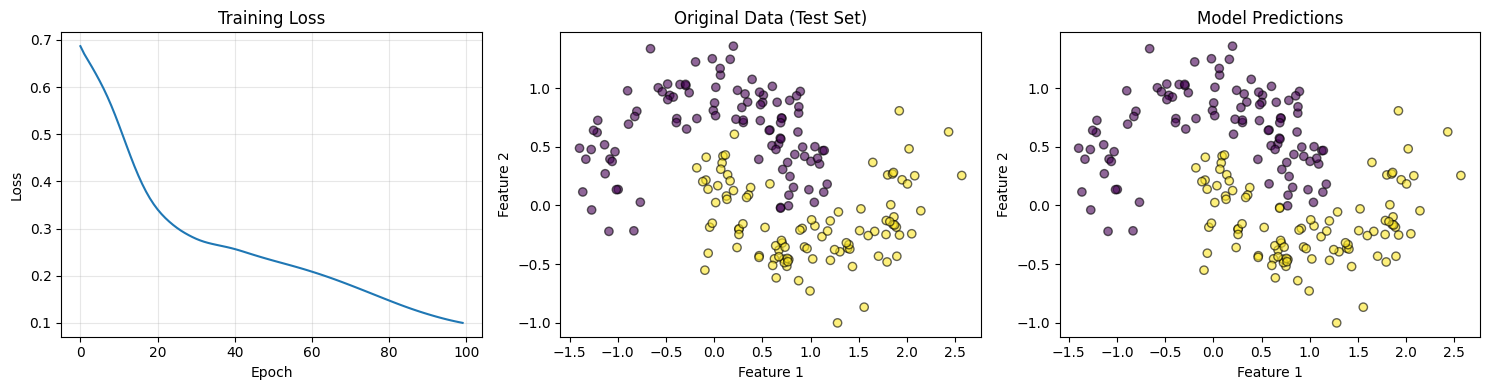


Key Takeaway: PyTorch provides:
  1. nn.Module: Easy neural network construction
  2. Autograd: Automatic gradient computation (loss.backward())
  3. Optimizers: Built-in optimization algorithms (Adam, SGD, etc.)
  4. GPU support: Can move entire model to GPU with model.to('cuda')


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic dataset: two interleaving moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Feature dimension: {X_train.shape[1]}")

# Define MLP architecture
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initialize model
model = SimpleMLP(input_dim=2, hidden_dim=16, output_dim=1)
print(f"\nModel architecture:")
print(model)

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
train_losses = []
test_accuracies = []

print("\nTraining...")
for epoch in range(epochs):
    # Forward pass
    model.train()
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()  # Automatic differentiation
    optimizer.step()
    
    train_losses.append(loss.item())
    
    # Evaluate on test set
    if (epoch + 1) % 20 == 0:
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor).squeeze()
            predictions = (test_outputs > 0.5).float()
            accuracy = (predictions == y_test_tensor).float().mean()
            test_accuracies.append(accuracy.item())
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Test Acc: {accuracy:.4f}")

print("\nTraining complete!")

# Final evaluation
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    predictions = (test_outputs > 0.5).float()
    final_accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Final Test Accuracy: {final_accuracy:.4f}")

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Training loss
axes[0].plot(train_losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].grid(True, alpha=0.3)

# Plot 2: Original data
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.6, edgecolors='k')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].set_title('Original Data (Test Set)')

# Plot 3: Predictions
axes[2].scatter(X_test[:, 0], X_test[:, 1], c=predictions.numpy(), cmap='viridis', alpha=0.6, edgecolors='k')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].set_title('Model Predictions')

plt.tight_layout()
plt.show()

print("\nKey Takeaway: PyTorch provides:")
print("  1. nn.Module: Easy neural network construction")
print("  2. Autograd: Automatic gradient computation (loss.backward())")
print("  3. Optimizers: Built-in optimization algorithms (Adam, SGD, etc.)")
print("  4. GPU support: Can move entire model to GPU with model.to('cuda')")

---

# Summary

## Library Selection Guide

| Task | Library |
|------|--------|
| Numerical arrays | NumPy |
| Optimization, integration | SciPy |
| Tabular data | Pandas |
| Visualization | Matplotlib |
| Classical ML | scikit-learn |
| Deep learning, GPU | PyTorch |

## Typical Workflow

```
1. Load data -> Pandas
2. Clean data -> Pandas
3. Explore -> Pandas + Matplotlib
4. Features -> Pandas + NumPy
5. Train -> scikit-learn or PyTorch
6. Evaluate -> Metrics + Matplotlib
```

## Performance Hierarchy

```
Python loops (slowest)
  -> NumPy vectorized (10-100x faster)
    -> PyTorch CPU (similar to NumPy)
      -> PyTorch GPU (10-100x faster than CPU)
```